In [8]:
import pandas as pd
from datetime import datetime,timedelta
import requests
import json


In [12]:
# Binance
def getCandles(symbol, interval, limit=0, startTime=None, endTime=None):
    url = 'https://www.binance.co/api/v1/klines?'
    params = {
        'symbol': symbol,
        'interval': interval
    }
    if limit:
        params['limit'] = limit
    if startTime:
        params['startTime'] = int(startTime.timestamp()*1000)
    if endTime:
        params['endTime'] = int(endTime.timestamp()*1000)
    r = requests.get(url, headers={
            'Content-Type': 'application/x-www-form-urlencoded',
            'Accept': 'application/json'
        }, params = params,timeout=300)
    text = json.loads(r.content)
    df = pd.DataFrame(text, columns=[
        "opentime", "open", "high", "low", "close", "volume","closetime","Quote","trades","buybase","buyquote","ignore"])
    df["datetime"] = df["opentime"].map(lambda x: datetime.fromtimestamp(x / 1000).strftime("%Y%m%d %H:%M:%S"))
    return df
# interval available: 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M
symbol = 'BTCUSDT'
EXCHANGE = "binance"
def vt_symbol(symbol):
    return "%s:%s" % (symbol, EXCHANGE)
def write(collection, data):
    for index, row in data.iterrows():
        bar = {}
        bar['open'] = float(row.open)
        bar['close'] = float(row.close)
        bar['high'] = float(row.high)
        bar['low'] = float(row.low)
        bar['volume'] = float(row.volume)
        bar['symbol'] = symbol
        bar['exchange'] = EXCHANGE
        bar['vtSymbol'] = vt_symbol(symbol)
        bar['openInterest'] = 0
        bar['datetime'] = datetime.strptime(row.datetime, "%Y%m%d %H:%M:%S")
        bar['date'] = bar['datetime'].date().strftime('%Y%m%d')
        bar['time'] = bar['datetime'].time().strftime('%H:%M:%S')
        flt = {'datetime': bar['datetime']}
        collection.update_one(flt, {'$set':bar}, upsert=True)
from datetime import timedelta
def iter_dates(start, end):
    start = start.replace(second=0, microsecond=0)
    while start < end:
        _next = start + timedelta(hours=12)
        yield start, _next - timedelta(seconds=1)
        start = _next


In [17]:
import pymongo
client = pymongo.MongoClient('localhost', 27017)
collection = client['VnTrader_1Min_Db'][vt_symbol(symbol)]
collection.create_index([('datetime', pymongo.ASCENDING)], unique=True)
for s, e in iter_dates(datetime(2018, 1, 1), datetime(2018, 11, 30)):
    data = getCandles(symbol,'1m' , 1000,startTime=s, endTime=e)
    write(collection, data)
    print(symbol, s, e, data.shape)

BTCUSDT 2018-01-01 00:00:00 2018-01-01 11:59:59 (720, 13)
BTCUSDT 2018-01-01 12:00:00 2018-01-01 23:59:59 (720, 13)
BTCUSDT 2018-01-02 00:00:00 2018-01-02 11:59:59 (720, 13)
BTCUSDT 2018-01-02 12:00:00 2018-01-02 23:59:59 (720, 13)
BTCUSDT 2018-01-03 00:00:00 2018-01-03 11:59:59 (720, 13)
BTCUSDT 2018-01-03 12:00:00 2018-01-03 23:59:59 (720, 13)
BTCUSDT 2018-01-04 00:00:00 2018-01-04 11:59:59 (661, 13)
BTCUSDT 2018-01-04 12:00:00 2018-01-04 23:59:59 (654, 13)
BTCUSDT 2018-01-05 00:00:00 2018-01-05 11:59:59 (720, 13)
BTCUSDT 2018-01-05 12:00:00 2018-01-05 23:59:59 (720, 13)
BTCUSDT 2018-01-06 00:00:00 2018-01-06 11:59:59 (720, 13)
BTCUSDT 2018-01-06 12:00:00 2018-01-06 23:59:59 (720, 13)
BTCUSDT 2018-01-07 00:00:00 2018-01-07 11:59:59 (720, 13)
BTCUSDT 2018-01-07 12:00:00 2018-01-07 23:59:59 (720, 13)
BTCUSDT 2018-01-08 00:00:00 2018-01-08 11:59:59 (720, 13)
BTCUSDT 2018-01-08 12:00:00 2018-01-08 23:59:59 (720, 13)
BTCUSDT 2018-01-09 00:00:00 2018-01-09 11:59:59 (720, 13)
BTCUSDT 2018-0

BTCUSDT 2018-03-13 00:00:00 2018-03-13 11:59:59 (720, 13)
BTCUSDT 2018-03-13 12:00:00 2018-03-13 23:59:59 (720, 13)
BTCUSDT 2018-03-14 00:00:00 2018-03-14 11:59:59 (720, 13)
BTCUSDT 2018-03-14 12:00:00 2018-03-14 23:59:59 (720, 13)
BTCUSDT 2018-03-15 00:00:00 2018-03-15 11:59:59 (720, 13)
BTCUSDT 2018-03-15 12:00:00 2018-03-15 23:59:59 (720, 13)
BTCUSDT 2018-03-16 00:00:00 2018-03-16 11:59:59 (720, 13)
BTCUSDT 2018-03-16 12:00:00 2018-03-16 23:59:59 (720, 13)
BTCUSDT 2018-03-17 00:00:00 2018-03-17 11:59:59 (720, 13)
BTCUSDT 2018-03-17 12:00:00 2018-03-17 23:59:59 (720, 13)
BTCUSDT 2018-03-18 00:00:00 2018-03-18 11:59:59 (720, 13)
BTCUSDT 2018-03-18 12:00:00 2018-03-18 23:59:59 (720, 13)
BTCUSDT 2018-03-19 00:00:00 2018-03-19 11:59:59 (720, 13)
BTCUSDT 2018-03-19 12:00:00 2018-03-19 23:59:59 (720, 13)
BTCUSDT 2018-03-20 00:00:00 2018-03-20 11:59:59 (720, 13)
BTCUSDT 2018-03-20 12:00:00 2018-03-20 23:59:59 (720, 13)
BTCUSDT 2018-03-21 00:00:00 2018-03-21 11:59:59 (720, 13)
BTCUSDT 2018-0

BTCUSDT 2018-05-23 00:00:00 2018-05-23 11:59:59 (720, 13)
BTCUSDT 2018-05-23 12:00:00 2018-05-23 23:59:59 (720, 13)
BTCUSDT 2018-05-24 00:00:00 2018-05-24 11:59:59 (720, 13)
BTCUSDT 2018-05-24 12:00:00 2018-05-24 23:59:59 (720, 13)
BTCUSDT 2018-05-25 00:00:00 2018-05-25 11:59:59 (720, 13)
BTCUSDT 2018-05-25 12:00:00 2018-05-25 23:59:59 (720, 13)
BTCUSDT 2018-05-26 00:00:00 2018-05-26 11:59:59 (720, 13)
BTCUSDT 2018-05-26 12:00:00 2018-05-26 23:59:59 (720, 13)
BTCUSDT 2018-05-27 00:00:00 2018-05-27 11:59:59 (720, 13)
BTCUSDT 2018-05-27 12:00:00 2018-05-27 23:59:59 (720, 13)
BTCUSDT 2018-05-28 00:00:00 2018-05-28 11:59:59 (720, 13)
BTCUSDT 2018-05-28 12:00:00 2018-05-28 23:59:59 (720, 13)
BTCUSDT 2018-05-29 00:00:00 2018-05-29 11:59:59 (720, 13)
BTCUSDT 2018-05-29 12:00:00 2018-05-29 23:59:59 (720, 13)
BTCUSDT 2018-05-30 00:00:00 2018-05-30 11:59:59 (720, 13)
BTCUSDT 2018-05-30 12:00:00 2018-05-30 23:59:59 (720, 13)
BTCUSDT 2018-05-31 00:00:00 2018-05-31 11:59:59 (720, 13)
BTCUSDT 2018-0

BTCUSDT 2018-08-02 00:00:00 2018-08-02 11:59:59 (720, 13)
BTCUSDT 2018-08-02 12:00:00 2018-08-02 23:59:59 (720, 13)
BTCUSDT 2018-08-03 00:00:00 2018-08-03 11:59:59 (720, 13)
BTCUSDT 2018-08-03 12:00:00 2018-08-03 23:59:59 (720, 13)
BTCUSDT 2018-08-04 00:00:00 2018-08-04 11:59:59 (720, 13)
BTCUSDT 2018-08-04 12:00:00 2018-08-04 23:59:59 (720, 13)
BTCUSDT 2018-08-05 00:00:00 2018-08-05 11:59:59 (720, 13)
BTCUSDT 2018-08-05 12:00:00 2018-08-05 23:59:59 (720, 13)
BTCUSDT 2018-08-06 00:00:00 2018-08-06 11:59:59 (720, 13)
BTCUSDT 2018-08-06 12:00:00 2018-08-06 23:59:59 (720, 13)
BTCUSDT 2018-08-07 00:00:00 2018-08-07 11:59:59 (720, 13)
BTCUSDT 2018-08-07 12:00:00 2018-08-07 23:59:59 (720, 13)
BTCUSDT 2018-08-08 00:00:00 2018-08-08 11:59:59 (720, 13)
BTCUSDT 2018-08-08 12:00:00 2018-08-08 23:59:59 (720, 13)
BTCUSDT 2018-08-09 00:00:00 2018-08-09 11:59:59 (720, 13)
BTCUSDT 2018-08-09 12:00:00 2018-08-09 23:59:59 (720, 13)
BTCUSDT 2018-08-10 00:00:00 2018-08-10 11:59:59 (720, 13)
BTCUSDT 2018-0

BTCUSDT 2018-10-12 00:00:00 2018-10-12 11:59:59 (720, 13)
BTCUSDT 2018-10-12 12:00:00 2018-10-12 23:59:59 (720, 13)
BTCUSDT 2018-10-13 00:00:00 2018-10-13 11:59:59 (720, 13)
BTCUSDT 2018-10-13 12:00:00 2018-10-13 23:59:59 (720, 13)
BTCUSDT 2018-10-14 00:00:00 2018-10-14 11:59:59 (720, 13)
BTCUSDT 2018-10-14 12:00:00 2018-10-14 23:59:59 (720, 13)
BTCUSDT 2018-10-15 00:00:00 2018-10-15 11:59:59 (720, 13)
BTCUSDT 2018-10-15 12:00:00 2018-10-15 23:59:59 (720, 13)
BTCUSDT 2018-10-16 00:00:00 2018-10-16 11:59:59 (720, 13)
BTCUSDT 2018-10-16 12:00:00 2018-10-16 23:59:59 (720, 13)
BTCUSDT 2018-10-17 00:00:00 2018-10-17 11:59:59 (720, 13)
BTCUSDT 2018-10-17 12:00:00 2018-10-17 23:59:59 (720, 13)
BTCUSDT 2018-10-18 00:00:00 2018-10-18 11:59:59 (720, 13)
BTCUSDT 2018-10-18 12:00:00 2018-10-18 23:59:59 (720, 13)
BTCUSDT 2018-10-19 00:00:00 2018-10-19 11:59:59 (720, 13)
BTCUSDT 2018-10-19 12:00:00 2018-10-19 23:59:59 (510, 13)
BTCUSDT 2018-10-20 00:00:00 2018-10-20 11:59:59 (720, 13)
BTCUSDT 2018-1

In [1]:
from vnpy.trader.app.ctaStrategy import BacktestingEngine

# 创建回测引擎对象
engine = BacktestingEngine()

# 设置回测使用的数据
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase('VnTrader_1Min_Db')  # 设置使用的历史数据库
engine.setStartDate('20180601 12:00',initHours=200) # 设置回测用的数据起始日期
engine.setEndDate('20181129 12:00') # 设置回测用的数据终止日期

# 配置回测引擎参数
engine.setSlippage(0.002)    # 设置滑点
engine.setRate(5/10000)   # 设置手续费千1
engine.setCapital(1000000)  # 设置回测本金

In [2]:
"""
这里的Demo是一个最简单的双均线策略实现
"""

from __future__ import division
from vnpy.trader.vtConstant import *
from vnpy.trader.app.ctaStrategy import CtaTemplate
import talib as ta

########################################################################
# 策略继承CtaTemplate
class RSIStrategy(CtaTemplate):
    """RSIStrategy"""
    className = 'RSIStrategy'
    author = 'yuanhongjian'
    
    # 策略参数（与参数列表对应）
    RSIPeriod = 20
    lot = 1          # 设置手数
    
    # 策略变量（与变量列表对应）
    transactionPrice = {} # 记录成交价格
    
    # 参数列表
    paramList = ['RSIPeriod']    
    
    # 变量列表
    varList = ['transactionPrice']  
    
    # 同步列表，保存了需要保存到数据库的变量名称（一般不修改）
    syncList = ['posDict', 'eveningDict']

    #----------------------------------------------------------------------
    def __init__(self, ctaEngine, setting):
        # 首先找到策略的父类（就是类CtaTemplate），然后把DoubleMaStrategy的对象转换为类CtaTemplate的对象
        super().__init__(ctaEngine, setting)
      
    #----------------------------------------------------------------------
    def onInit(self):
        """初始化策略"""
        self.writeCtaLog(u'策略初始化')
        self.transactionPrice = {s:0 for s in self.symbolList} # 生成成交价格的字典（对应上面的策略变量）
        self.putEvent()

    #----------------------------------------------------------------------
    def onStart(self):
        """启动策略（必须由用户继承实现）"""
        self.writeCtaLog(u'策略启动')
        self.putEvent()
   
    #----------------------------------------------------------------------
    def onStop(self):
        """停止策略"""
        self.writeCtaLog(u'策略停止')
        self.putEvent()
        
    #----------------------------------------------------------------------
    def onTick(self, tick):
        """收到行情TICK推送"""
        pass
        
    #----------------------------------------------------------------------
    def on60MinBar(self, bar):
        """收到60分钟Bar推送"""
        symbol = bar.vtSymbol
        
        am60 = self.getArrayManager(symbol, "60m") # 获取历史数组
        
        if not am60.inited:
            return
        
        # 计算策略需要的信号-------------------------------------------------
        rsi = ta.RSI(am60.close, self.RSIPeriod)
        
        overBought = rsi[-1] > 70
        overSold = rsi[-1] < 30

        
        # 构建进出场逻辑-------------------------------------------------
        if overSold and (self.posDict[symbol + "_LONG"]==0):
            if self.posDict[symbol + "_SHORT"] == 0:
                self.buy(symbol, bar.close * 1.01, self.lot)
            elif self.posDict[symbol + "_SHORT"] > 0:
                self.cover(symbol, bar.close * 1.02, self.posDict[symbol + "_SHORT"])
                self.buy(symbol, bar.close * 1.01, self.lot)
        
        elif overBought and (self.posDict[symbol + "_SHORT"] == 0):
            if self.posDict[symbol + "_LONG"] == 0:
                self.short(symbol, bar.close * 0.99, self.lot)
            elif self.posDict[symbol + "_LONG"] > 0:
                self.sell(symbol, bar.close * 0.99, self.posDict[symbol + "_LONG"])
                self.short(symbol, bar.close *0.99, self.lot)
        
        # 发出状态更新事件
        self.putEvent()
        
    #----------------------------------------------------------------------
    def onOrder(self, order):
        """收到委托变化推送"""
        # 对于无需做细粒度委托控制的策略，可以忽略onOrder
        pass
    
    #----------------------------------------------------------------------
    def onTrade(self, trade):
        """收到成交推送"""
        symbol = trade.vtSymbol
        if trade.offset == OFFSET_OPEN:  # 判断成交订单类型
            self.transactionPrice[symbol] = trade.price # 记录成交价格
    #----------------------------------------------------------------------
    def onStopOrder(self, so):
        """停止单推送"""
        pass

In [3]:
# 在引擎中创建策略对象
parameterDict = {'symbolList':['BTCUSDT:binance']} # 策略参数配置
engine.initStrategy(RSIStrategy, parameterDict)    # 创建策略对象
engine.runBacktesting()

仓位字典构造完成 
初始仓位: {'BTCUSDT:binance_LONG': 0, 'BTCUSDT:binance_SHORT': 0}
[DEBUG] 注册品种BTCUSDT:binance上的on_60Min_bar函数functools.partial(<function RSIStrategy.on60MinBar at 0x1120d8378>, <__main__.RSIStrategy object at 0x1120e5518>)
2018-12-16 13:03:31.046316	开始回测
2018-12-16 13:03:31.046405	策略初始化
2018-12-16 13:03:31.048781	载入历史数据。数据范围:[20180524 04:00,20180601 12:00)
2018-12-16 13:03:31.815344	 当前品种 BTCUSDT:binance 的数据，全部来自于本地缓存
2018-12-16 13:03:31.818921	载入完成，数据量：12000
2018-12-16 13:03:31.819346	策略初始化完成
2018-12-16 13:03:31.819402	策略启动完成
2018-12-16 13:03:31.819466	开始回放回测数据,回测范围:[20180601 12:00,20181129 12:00)
2018-12-16 13:03:31.843394	载入历史数据。数据范围:[20180601 12:00,20181129 12:00)
2018-12-16 13:03:47.040879	 当前品种 BTCUSDT:binance 的数据，全部来自于本地缓存
2018-12-16 13:03:47.127687	载入完成，数据量：258848
2018-12-16 13:03:47.128083	当前回放数据:[20180601 12:00,20181129 12:00)
[INFO] 品种BTCUSDT:binance开始生成未完成的1mK线数据,时间起点为:20180601120000
2018-12-16 13:03:47.131217	载入历史数据。数据范围:[20180531 20:51,20180603 12:01)
2018-12-16 13:

In [4]:
import pandas as pd
tradeReport = pd.DataFrame([obj.__dict__ for obj in engine.tradeDict.values()])
tradeDf = tradeReport.set_index('dt')
tradeDf.tail()

,direction,exchange,exchangeOrderID,fee,gatewayName,offset,orderID,orderTime,price,price_avg,rawData,status,symbol,tradeID,tradeTime,volume,vtOrderID,vtSymbol,vtTradeID
dt,,,,,,,,,,,,,,,,,,,
2018-10-20 09:00:00,多,,,0.0,,开仓,33,,6518.05,0.0,None,,,33,2018-10-20 09:00:00,1,33,BTCUSDT:binance,33
2018-11-07 09:00:00,空,,,0.0,,平仓,34,,6565.17,0.0,None,,,34,2018-11-07 09:00:00,1,34,BTCUSDT:binance,34
2018-11-07 09:00:00,空,,,0.0,,开仓,35,,6565.17,0.0,None,,,35,2018-11-07 09:00:00,1,35,BTCUSDT:binance,35
2018-11-15 00:00:00,多,,,0.0,,平仓,36,,6231.36,0.0,None,,,36,2018-11-15 00:00:00,1,36,BTCUSDT:binance,36
2018-11-15 00:00:00,多,,,0.0,,开仓,37,,6231.36,0.0,None,,,37,2018-11-15 00:00:00,1,37,BTCUSDT:binance,37


2018-12-16 13:04:10.290196	计算按日统计结果
2018-12-16 13:04:10.347784	------------------------------
2018-12-16 13:04:10.347925	首个交易日：	2018-06-01 00:00:00
2018-12-16 13:04:10.347969	最后交易日：	2018-11-29 00:00:00
2018-12-16 13:04:10.348002	总交易日：	182
2018-12-16 13:04:10.348033	盈利交易日	79
2018-12-16 13:04:10.348063	亏损交易日：	93
2018-12-16 13:04:10.348095	起始资金：	1000000
2018-12-16 13:04:10.348179	结束资金：	995,991.21
2018-12-16 13:04:10.348233	总收益率：	-0.4%
2018-12-16 13:04:10.348284	年化收益：	-0.53%
2018-12-16 13:04:10.348324	总盈亏：	-4,008.79
2018-12-16 13:04:10.348578	最大回撤: 	-4,395.35
2018-12-16 13:04:10.348639	百分比最大回撤: -0.44%
2018-12-16 13:04:10.348682	总手续费：	122.94
2018-12-16 13:04:10.348719	总滑点：	0.07
2018-12-16 13:04:10.348934	总成交金额：	245,875.22
2018-12-16 13:04:10.348989	总成交笔数：	37
2018-12-16 13:04:10.349028	日均盈亏：	-22.03
2018-12-16 13:04:10.349068	日均手续费：	0.68
2018-12-16 13:04:10.349103	日均滑点：	0.0
2018-12-16 13:04:10.349241	日均成交金额：	1,350.96
2018-12-16 13:04:10.349308	日均成交笔数：	0.2
2018-12-16 13:04:10.349351	日均收益率：	-0.

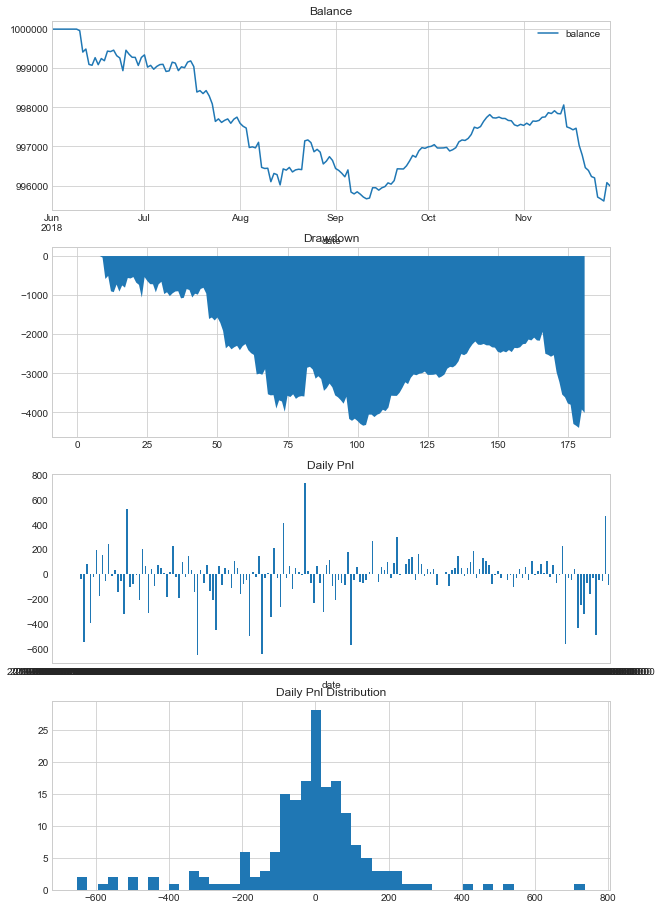

In [5]:
# 显示逐日回测结果
engine.showDailyResult()

2018-12-08 21:19:12.363669	计算回测结果
2018-12-08 21:19:12.378192	------------------------------
2018-12-08 21:19:12.378349	第一笔交易：	2018-06-19 02:00:00
2018-12-08 21:19:12.378412	最后一笔交易：	2018-11-29 11:58:00
2018-12-08 21:19:12.378473	总交易次数：	19
2018-12-08 21:19:12.378539	总盈亏：	-4,010.88
2018-12-08 21:19:12.378601	最大回撤: 	-4,082.26
2018-12-08 21:19:12.378654	平均每笔盈利：	-211.1
2018-12-08 21:19:12.378714	平均每笔滑点：	0.0
2018-12-08 21:19:12.378766	平均每笔佣金：	6.58
2018-12-08 21:19:12.378894	胜率		57.89%
2018-12-08 21:19:12.378981	盈利交易平均值	222.04
2018-12-08 21:19:12.379055	亏损交易平均值	-806.67
2018-12-08 21:19:12.379133	盈亏比：	0.28


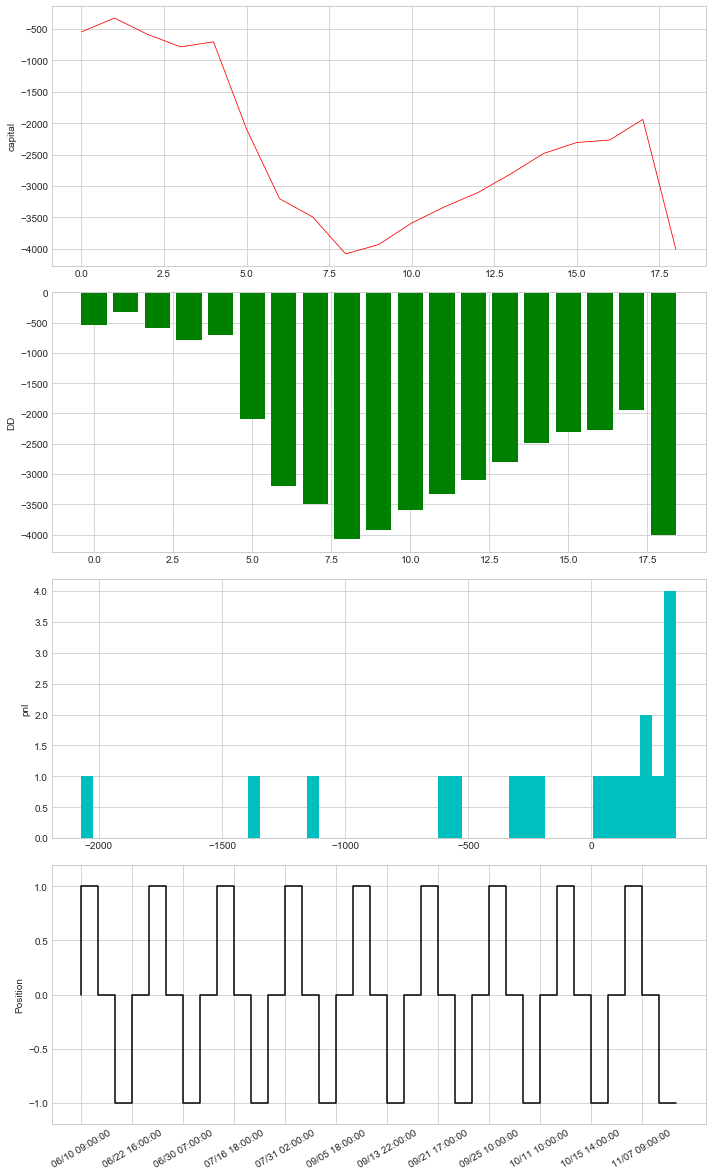

In [11]:
# 显示逐笔回测结果
engine.showBacktestingResult()

In [12]:
df = engine.calculateDailyResult()
df1, result = engine.calculateDailyStatistics(df)

2018-12-08 21:19:14.571849	计算按日统计结果


In [13]:
print(pd.Series(result)) # 显示绩效指标

annualizedReturn              -0.528632
dailyCommission                0.675481
dailyNetPnl                    -22.0263
dailyReturn                 -0.00220706
dailySlippage               0.000406593
dailyTradeCount                0.203297
dailyTurnover                   1350.96
endBalance                       995991
endDate             2018-11-29 00:00:00
lossDays                             93
maxDdPercent                  -0.439535
maxDrawdown                    -4395.35
profitDays                           79
returnStd                     0.0183573
sharpeRatio                    -1.86256
startDate           2018-06-01 00:00:00
totalCommission                 122.938
totalDays                           182
totalNetPnl                    -4008.79
totalReturn                   -0.400879
totalSlippage                     0.074
totalTradeCount                      37
totalTurnover                    245875
dtype: object
